<a href="https://colab.research.google.com/github/gayatri-2219/Bank-management/blob/main/Car_pricepredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score


In [249]:
car = pd.read_csv('/content/car data.csv')

In [250]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [251]:
car.shape

(301, 9)

In [252]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


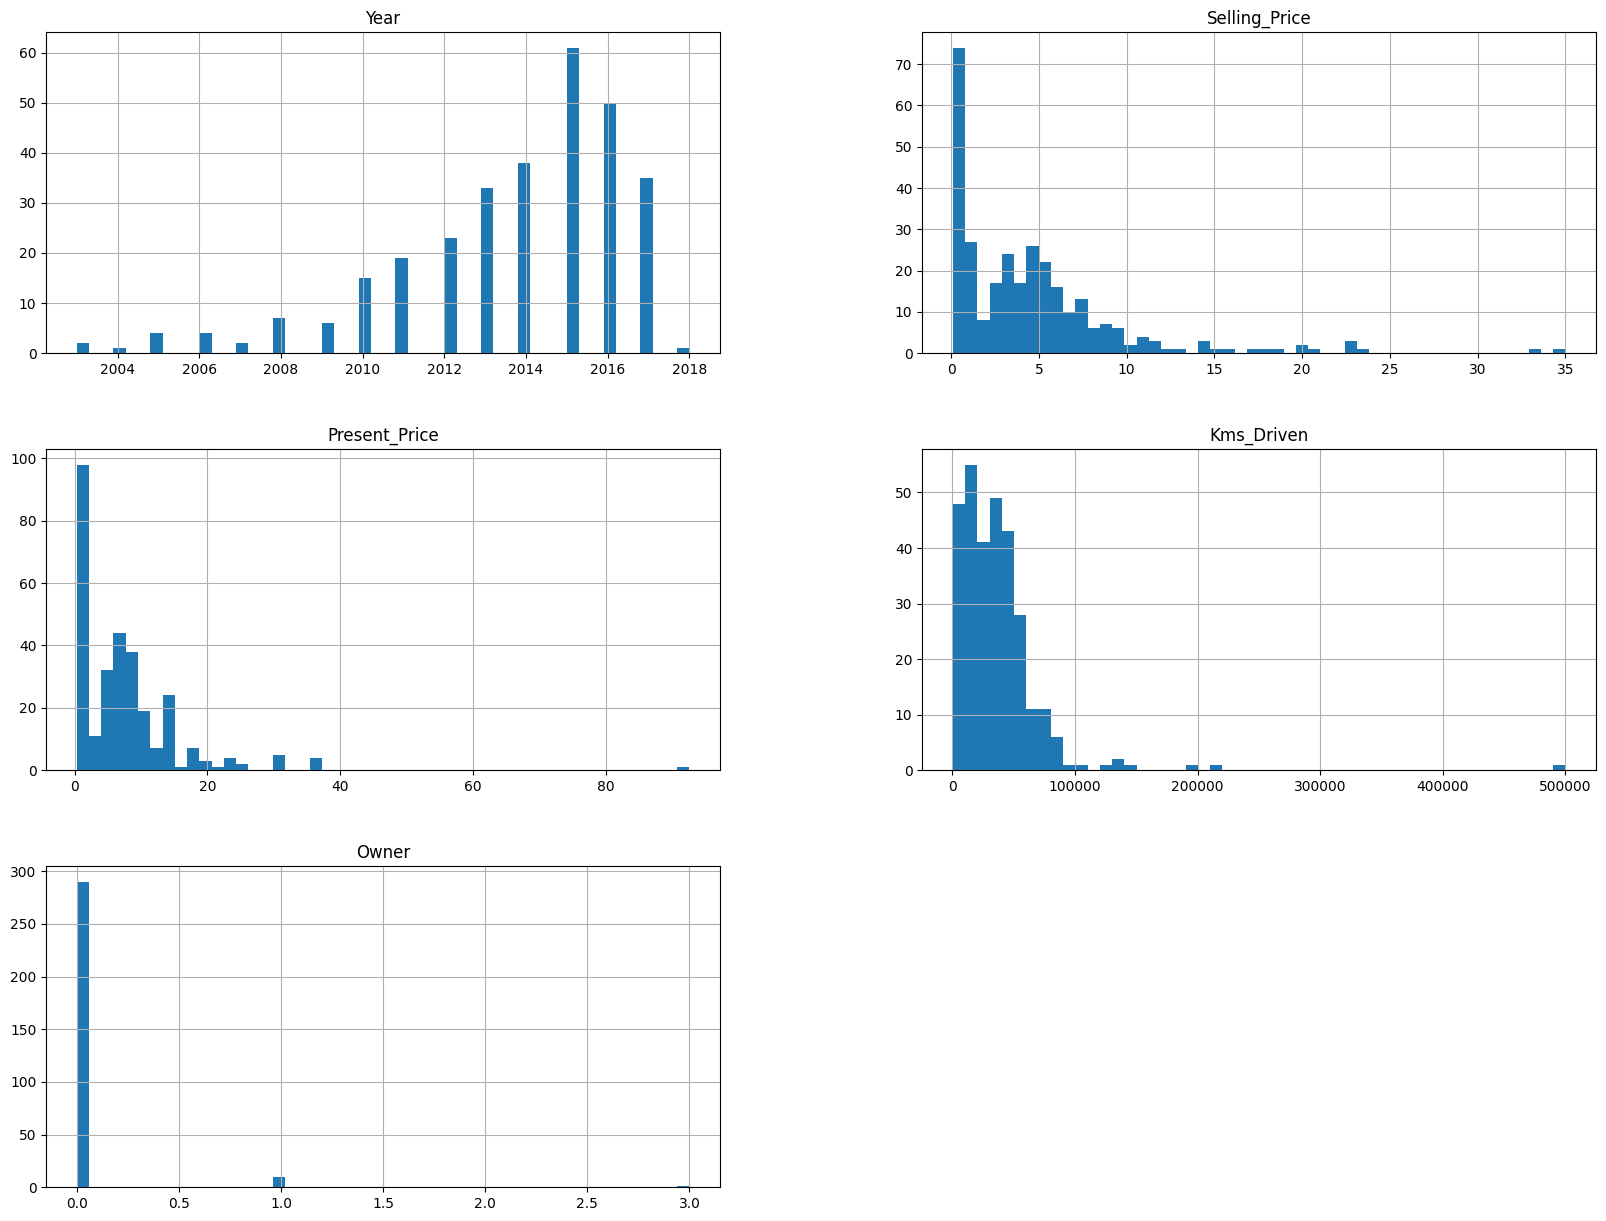

In [253]:
car.hist(bins=50,figsize=(20,15))
plt.show()

In [254]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [255]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
Seller_Type
0    195
1    106
Name: count, dtype: int64
Transmission
0    261
1     40
Name: count, dtype: int64


In [256]:
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [257]:
car.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0


In [258]:
le = LabelEncoder()
car['Car_Name'] = le.fit_transform(car['Car_Name'])


In [259]:
car.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,0,0,0,0
1,93,2013,4.75,9.54,43000,1,0,0,0
2,68,2017,7.25,9.85,6900,0,0,0,0


In [260]:
X = car.drop(['Selling_Price'], axis=1)
Y = car['Selling_Price']


In [261]:
print(X)

     Car_Name  Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0          90  2014           5.59       27000          0            0   
1          93  2013           9.54       43000          1            0   
2          68  2017           9.85        6900          0            0   
3          96  2011           4.15        5200          0            0   
4          92  2014           6.87       42450          1            0   
..        ...   ...            ...         ...        ...          ...   
296        69  2016          11.60       33988          1            0   
297        66  2015           5.90       60000          0            0   
298        69  2009          11.00       87934          0            0   
299        69  2017          12.50        9000          1            0   
300        66  2016           5.90        5464          0            0   

     Transmission  Owner  
0               0      0  
1               0      0  
2               0      0  
3  

In [262]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


**Splitting the data**

In [263]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [264]:
feature_names = ['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [268]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[feature_names])
X_test = scaler.transform(X_test[feature_names])

In [269]:
model = LinearRegression()

In [270]:
model.fit(X_train,Y_train)

LinearRegression()

**prediction on training**

In [271]:
training_data_prediction = model.predict(X_train)

In [272]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799469863385039


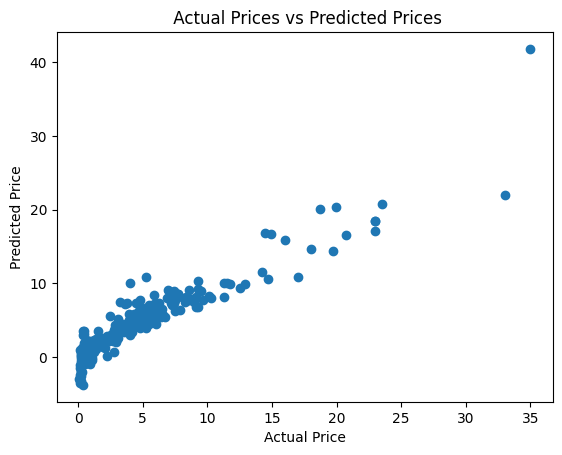

In [273]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

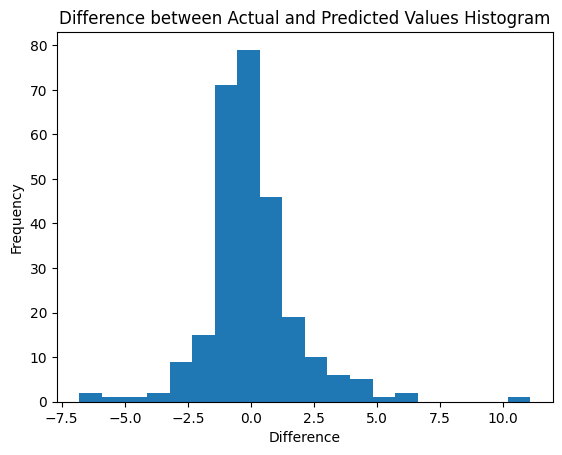

In [274]:
diff = Y_train - training_data_prediction
plt.hist(diff, bins=20)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Difference between Actual and Predicted Values Histogram')
plt.show()

In [275]:
test_data_prediction = model.predict(X_test)

In [276]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8368441817680745


In [281]:
score=[]
for i in range(1000):
  score.append(r2_score(Y_test, test_data_prediction))

In [282]:
np.argmax(score)

0

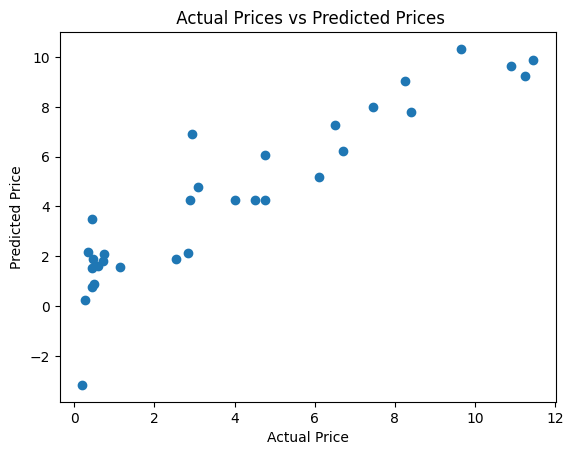

In [277]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

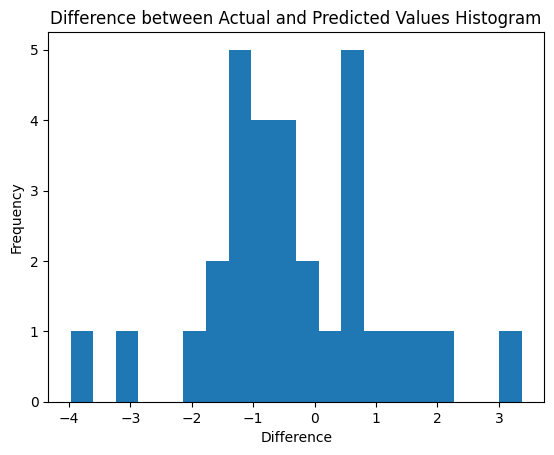

In [278]:
diff = Y_test - test_data_prediction
plt.hist(diff, bins=20)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Difference between Actual and Predicted Values Histogram')
plt.show()

In [279]:
# Function to predict car price including the car name
def predict_car_price(Car_Name, Year, Present_Price, Kms_Driven, Owner, Fuel_Type, Seller_Type, Transmission):
    global scaler  # Access the global scaler
    input_data = pd.DataFrame({
        'Car_Name': [le.transform([Car_Name])[0]],
        'Year': [Year],
        'Present_Price': [Present_Price],
        'Kms_Driven': [Kms_Driven],
        'Owner': [Owner],
        'Fuel_Type': [Fuel_Type],
        'Seller_Type': [Seller_Type],
        'Transmission': [Transmission]
    })

    # Standardize numerical features
    input_data = scaler.transform(input_data[feature_names])

    # Predict the price
    price_prediction = model.predict(input_data)
    return price_prediction[0]
predicted_price = predict_car_price('sx4', 2018, 9.85, 40000, 0, 1, 0, 1)
predicted_price_in_inr = round(predicted_price * 1_00_000)
print(f"Predicted Car Price: Rs {predicted_price_in_inr}")

# Prediction using example values
predicted_price = predict_car_price('sx4', 2018, 5.59, 27000, 0, 0, 0, 0)
predicted_price_in_inr = round(predicted_price * 1_00_000)
print(f"Predicted Car Price: Rs {predicted_price_in_inr}")

Predicted Car Price: Rs 1052177
Predicted Car Price: Rs 546775


In [283]:
import pickle

In [284]:
with open('car_price_model.pkl', 'wb') as file:
    pickle.dump((model, scaler, le), file)

In [285]:
from google.colab import files
files.download('car_price_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [286]:
corr_matrix=car.corr()
corr_matrix['Selling_Price'].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878983
Fuel_Type        0.509467
Car_Name         0.499198
Transmission     0.367128
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Seller_Type     -0.550724
Name: Selling_Price, dtype: float64